# Loading Data Exercise Tasks

This exercise focuses on getting API data using the requests library and wrangling it into the right format. The data will come back from the library in a data structure with nested dictionaries and lists, so this task requires knowledge of how to:

* inspect the data structure to determine a strategy for extracting data
* use chained keys and indices to access data
* use loops or list comprehensions to apply the same transformation across every item in a list
* use string methods to convert strings into lists
  
If you don't want to practice using API data (e.g., you already have a spreadsheet or text file with your chosen custom dataset in the appropriate format), then you can feel free to skip this part!

Note: The original name of the Wikipedia page used in this exercise was `2023_Turkey-Syria_earthquake` but the page has been renamed to `2023_Turkey–Syria_earthquakes` (with an s at the end). If you are getting 0 results in your dataframe, double-check the name of the Wikipedia page in the request.

## Step 1: Preparing a Dataset with Embeddings

Add your API key to the cell below then run it.


In [1]:
import openai
openai.api_base = 'https://openai.vocareum.com/v1'
openai.api_key = "voc-1532767545126677339448966a530fbbd0ba0.61572308"

## Loading the Data

We are using the `requests` library ([documentation here](https://requests.readthedocs.io/en/latest/user/quickstart/)) to get the text of a page from Wikipedia using the `extracts` API feature ([documentation here](https://www.mediawiki.org/w/api.php?action=help&modules=query%2Bextracts)). You can ignore the details of the `params` being sent — the important takeaway is that **`response_dict` is a Python dictionary containing the the response to our query**.

Run the cell below as-is.

In [2]:
import requests

# Get the Wikipedia page for the 2023 Turkey–Syria earthquake
params = {
    "action": "query", 
    "prop": "extracts",
    "exlimit": 1,
    "titles": "2023_Turkey–Syria_earthquakes",
    "explaintext": 1,
    "formatversion": 2,
    "format": "json"
}
resp = requests.get("https://en.wikipedia.org/w/api.php", params=params)
response_dict = resp.json()



In [3]:
response_dict

{'batchcomplete': True,
 'query': {'normalized': [{'fromencoded': False,
    'from': '2023_Turkey–Syria_earthquakes',
    'to': '2023 Turkey–Syria earthquakes'}],
  'pages': [{'pageid': 72956318,
    'ns': 0,
    'title': '2023 Turkey–Syria earthquakes',
    'extract': 'On 6 February 2023, at 04:17 TRT (01:17 UTC), a Mw 7.8 earthquake struck southern and central Turkey and northern and western Syria. The epicenter was 37 km (23 mi) west–northwest of Gaziantep. The earthquake had a maximum Mercalli intensity of XII (Extreme) around the epicenter and in Antakya. It was followed by a Mw\u202f7.7 earthquake at 13:24. This earthquake was centered 95 km (59 mi) north-northeast from the first. There was widespread damage and tens of thousands of fatalities.\nThe Mw\u202f7.8 earthquake is the largest in Turkey since the 1939 Erzincan earthquake of the same magnitude, and jointly the second-largest in the country, after larger estimates for the 1668 North Anatolia earthquake. It is also one of 

### TODO: Parse `response_dict` to get a list of text data samples

Look at the nested data structure of `response_dict` and find the key-value pair with the key of `"extract"`. The associated value will be a string containing a long block of text. Split this text into a list of strings using the `"\n"` separator and assign to the variable `text_data`.

If you're getting stuck, you can click to reveal the solution then copy and paste this into the cell below.

---

<details>
    <summary style="cursor: pointer"><strong>Solution (click to show/hide)</strong></summary>

```python
text_data = response_dict["query"]["pages"][0]["extract"].split("\n")
```

</details>

In [6]:
response_dict['query'].keys()


dict_keys(['normalized', 'pages'])

In [10]:
text_data = response_dict['query']['pages'][0]['extract'].split('\n')

In [11]:
text_data

['On 6 February 2023, at 04:17 TRT (01:17 UTC), a Mw 7.8 earthquake struck southern and central Turkey and northern and western Syria. The epicenter was 37 km (23 mi) west–northwest of Gaziantep. The earthquake had a maximum Mercalli intensity of XII (Extreme) around the epicenter and in Antakya. It was followed by a Mw\u202f7.7 earthquake at 13:24. This earthquake was centered 95 km (59 mi) north-northeast from the first. There was widespread damage and tens of thousands of fatalities.',
 'The Mw\u202f7.8 earthquake is the largest in Turkey since the 1939 Erzincan earthquake of the same magnitude, and jointly the second-largest in the country, after larger estimates for the 1668 North Anatolia earthquake. It is also one of the strongest earthquakes ever recorded in the Levant. It was felt as far as Egypt and the Black Sea coast of Turkey. There were more than 30,000 aftershocks in the three months that followed. The seismic sequence was the result of shallow strike-slip faulting along

### Adding the Text Data to a DataFrame

Run the cell below as-is.

In [14]:
import pandas as pd 

# Load page text into dataframe
df = pd.DataFrame()
df['text'] = text_data

# Clean up dataframe to remove empty lines and headings
df = df[(
    (df["text"].str.len() > 0) & (~df["text"].str.startswith("=="))
)].reset_index(drop=True)
df.head(10)

,text
0,"On 6 February 2023, at 04:17 TRT (01:17 UTC), ..."
1,The Mw 7.8 earthquake is the largest in Turkey...
2,There was widespread damage in an area of abou...
3,"The confirmed death toll in Turkey was 53,537;..."
4,"Damaged roads, winter storms, and disruption t..."
5,Central southern Turkey and northwestern Syria...
6,The 700 km-long (430 mi) EAF is subdivided int...
7,The northern part of the DST is subdivided int...
8,The EAF has produced large or damaging earthqu...
9,The Palu and Pütürge segments in the east disp...


In [15]:
df['text'][0]

'On 6 February 2023, at 04:17 TRT (01:17 UTC), a Mw 7.8 earthquake struck southern and central Turkey and northern and western Syria. The epicenter was 37 km (23 mi) west–northwest of Gaziantep. The earthquake had a maximum Mercalli intensity of XII (Extreme) around the epicenter and in Antakya. It was followed by a Mw\u202f7.7 earthquake at 13:24. This earthquake was centered 95 km (59 mi) north-northeast from the first. There was widespread damage and tens of thousands of fatalities.'

__This code creates embeddings for that text sample. Run the cell below as-is.__

In [16]:
EMBEDDING_MODEL_NAME = 'text-embedding-ada-002'
response= openai.Embedding.create(
    input = [df['text'][0]],
    engine = EMBEDDING_MODEL_NAME
)

# Extract and print the first 20 numbers in the embedding 
response_list = response['data']
first_item = response_list[0]
first_item_embedding = first_item['embedding']
print(first_item_embedding[:20])

[-0.007856861688196659, -0.014842228963971138, -0.013575209304690361, -0.030622990801930428, 0.002133486559614539, 0.02091587893664837, -0.039016157388687134, -0.016612034291028976, 0.0042066387832164764, -0.029845349490642548, 0.022859983146190643, 0.0521019883453846, -0.010779721662402153, -0.01846228539943695, 0.011972999200224876, -0.00023547121963929385, 0.015365125611424446, -0.015405348502099514, 0.005071430001407862, -0.008674726821482182]


### Creating a list of embeddings

This code sends all of the data from `df["text"].tolist()` to the `openai.Embedding.create` function, then extracts the resulting embeddings and creates a list of embeddings called `embeddings`.

Run the cell below as-is.

In [18]:
response = openai.Embedding.create(
    input = df['text'].tolist(),
    engine = EMBEDDING_MODEL_NAME
)

# Extract embeddings
embeddings = [data['embedding'] for data in response['data']]

### Adding Embeddings to DataFrame and Saving as CSV

Run the cell below as-is.

In [20]:
df['embeddings'] = embeddings
df.to_csv("files/embeddings_practice.csv")

## Conclusion

You have now created and saved an embeddings index!

# Semantic Text Search and Cosine Similarity

Now that we have embeddings for our dataset, we can use them to perform a semantic text search

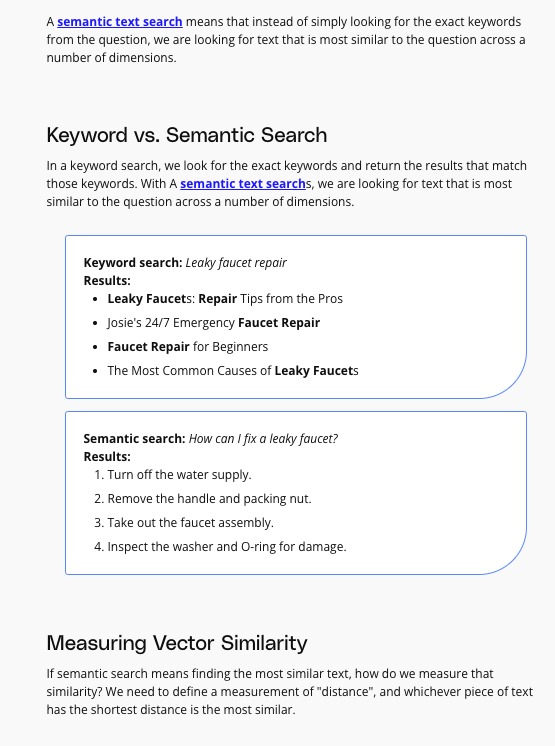 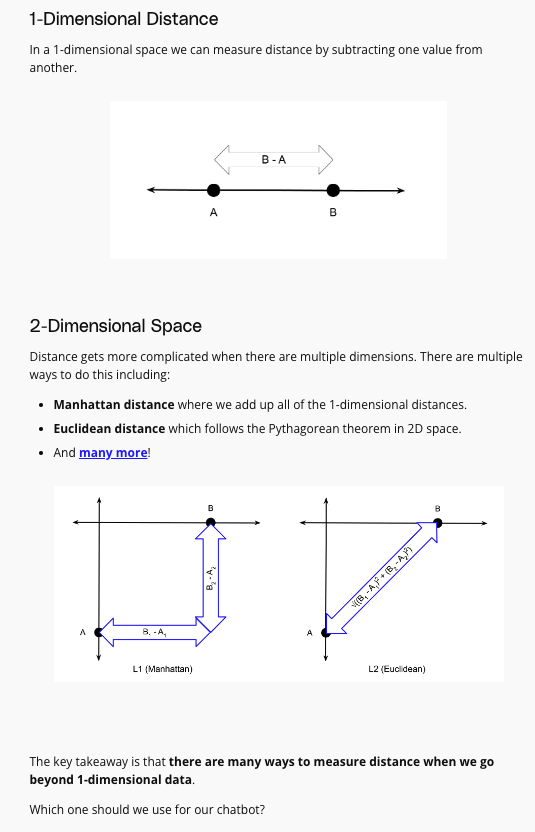 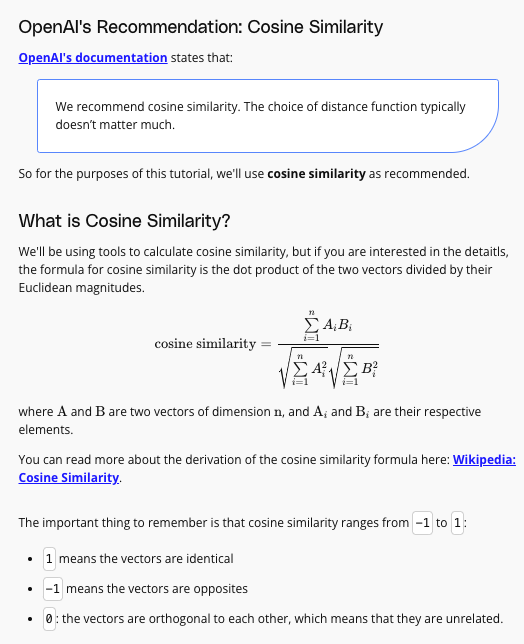 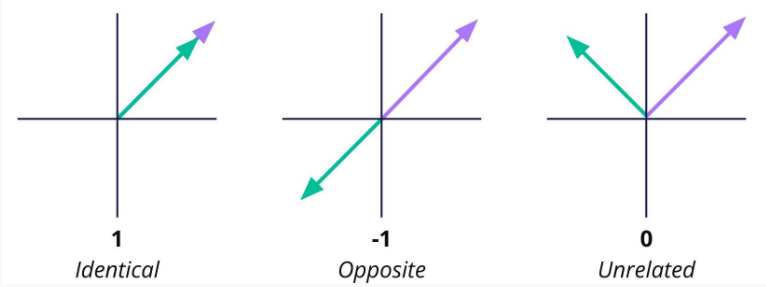 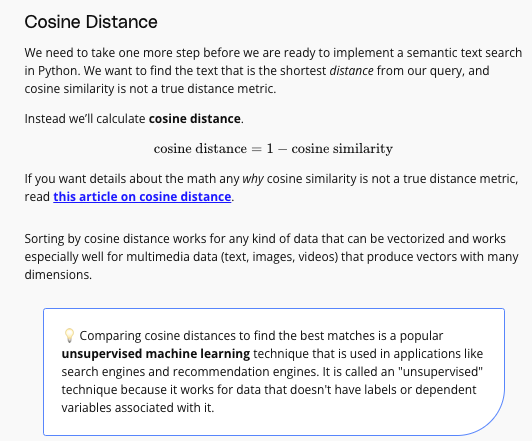 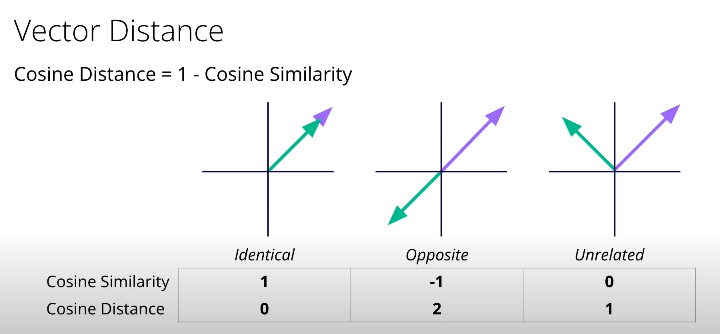